## About the project

The churn of customers is a concern for every company, this project aims to predict which demographic of customers of a telecommunication company are likely to leave and why.Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

### Import packages

In [50]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])
await piplite.install(['scipy'])


In [78]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

In [52]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())


### About the dataset
This is a historical customer dataset where each row represents one customer.

The dataset includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

##### Load the data


In [53]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"

In [54]:
await download(path, "ChurnData.csv")
path="ChurnData.csv"

churn_df = pd.read_csv(path)
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Data pre-processsing
Select features for modelling and change categorical values to integers

In [55]:
churn_df = churn_df[['tenure', 'age','address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [56]:
print('The shape is: {}\n'.format(churn_df.shape))

The shape is: (200, 10)



In [67]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [68]:
Y = np.asarray(churn_df['churn'])
Y[0:5]

array([1, 1, 0, 0, 0])

Normalize the dataset

In [69]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

### Train/Test dataset

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)


Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [125]:
# Model with logistic regression algorithm with regularization of 0.01
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)
pred = lr.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [126]:
# prediction probability
pred_prob = lr.predict_proba(X_test)
pred_prob

array([[0.54, 0.46],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.63, 0.37],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.66, 0.34],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.53, 0.47],
       [0.64, 0.36],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.42, 0.58],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.64, 0.36],
       [0.4 , 0.6 ],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.51, 0.49]])

### Evaluation

#### Jaccard Index
the size of the intersection divided by the size of the union of the two label sets

In [127]:
print(jaccard_score(Y_test, pred, pos_label=0))

0.7058823529411765


#### Confusion matrix

In [128]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    # print and plot the confusion matrix.
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, pred, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


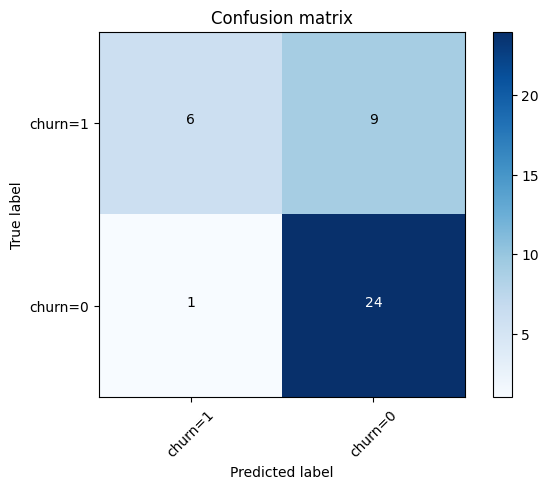

In [129]:
# compute the confusion matrix
cnf_matrix = confusion_matrix(Y_test, pred, labels=[1,0])
np.set_printoptions(precision=2)

# plot the non-normalized conf matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1', 'churn=0'], normalize=False,title='Confusion matrix')



_Churn=1_
Out of 15 churning customers the classifier correctly predicted 6  of them as likely to churn and 9 incorrectly as false positives. While 9 of the customers had a churn value of 1 it predicted the churn value as 0. 

_Churn=0_
Out of the 25 customers who were predicted as unlikely to churn 24 were correctly prediected and 1 was a False negative. 

In [130]:
print (classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



#### Measure performance through calcualting log loss

In [131]:
log_loss(Y_test, pred_prob)

0.6017092478101185

### Build a model with a different solver and regularization value

In [180]:
LR2 = LogisticRegression(C=0.05, solver='saga').fit(X_train,Y_train)
yhat_prob = LR2.predict_proba(X_test)
print ("LogLoss: : %.10f" % log_loss(Y_test, yhat_prob))

LogLoss: : 0.5855162251


In [181]:
yhat = LR2.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [182]:
print (classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40



### Conclusion 
The regularization strength has more effect on the log loss than the solver. Regularization parameter of 0.05 gives lower log loss, but has a lower F1 because it has a lower balance between precision and recall. 

Therefore the model 